markdown
# # 📊 03 - Univariate Analysis
# 
# **Author:** Data Science Team  
# **Date:** $(date +%Y-%m-%d)  
# **Version:** 1.0
# 
# ## 📋 Overview
# Comprehensive analysis of individual variables to understand their distributions, central tendencies, and characteristics.
# 
# ### Objectives:
# 1. Analyze distributions of numerical variables
# 2. Examine frequencies of categorical variables
# 3. Detect outliers and anomalies
# 4. Assess data quality at variable level
# 5. Prepare data for further analysis
# 
# ---


In [1]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from pathlib import Path
import json
from datetime import datetime
from IPython.display import display, Markdown, HTML

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Pandas options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
pd.set_option('display.width', 1000)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set paths based on your structure
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
DATA_RAW = PROJECT_ROOT / "data" / "00_raw"
DATA_INTERIM = PROJECT_ROOT / "data" / "01_interim"
OUTPUT_PATH = PROJECT_ROOT / "reports" / "univariate_analysis"
REPORTS_PATH = PROJECT_ROOT / "reports"

# Create directories
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)
REPORTS_PATH.mkdir(parents=True, exist_ok=True)

print(f"✅ Setup complete!")
print(f"📁 Project Root: {PROJECT_ROOT}")
print(f"📁 Raw Data: {DATA_RAW}")
print(f"📁 Interim Data: {DATA_INTERIM}")


✅ Setup complete!
📁 Project Root: d:\10 acadamy\insurance anlysis\Insurance_Risk_Analytics_Predictive_modeling\notebooks\task1_eda
📁 Raw Data: d:\10 acadamy\insurance anlysis\Insurance_Risk_Analytics_Predictive_modeling\notebooks\task1_eda\data\00_raw
📁 Interim Data: d:\10 acadamy\insurance anlysis\Insurance_Risk_Analytics_Predictive_modeling\notebooks\task1_eda\data\01_interim


In [2]:
# Cell 2: Load Real Insurance Data (Direct TXT)
print("="*80)
print("📂 LOADING REAL INSURANCE DATA")
print("="*80)

from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime

# Define the exact path - based on your directory
EXACT_PATH = Path(r"C:\Users\G5\Desktop\Insurance Anlytics\data\01_interim\cleaned_data.txt")
print(f"📁 Loading from: {EXACT_PATH}")

# Check if file exists
if not EXACT_PATH.exists():
    print(f"❌ File not found: {EXACT_PATH}")
    print(f"🔍 Current directory: {Path.cwd()}")
    raise FileNotFoundError(f"File not found: {EXACT_PATH}")

# Get file info
file_size_mb = EXACT_PATH.stat().st_size / (1024**2)
print(f"✅ File found! Size: {file_size_mb:.1f} MB")

# First, detect the delimiter
print(f"\n🔍 Detecting file format...")
with open(EXACT_PATH, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    second_line = f.readline()

# Show first line preview (replace tabs with visible marker)
preview = first_line[:100].replace('\t', '[TAB]').replace('\n', '[NEWLINE]')
print(f"📝 First line: {preview}...")

# Count potential delimiters
delimiters = {
    ',': first_line.count(','),
    '|': first_line.count('|'),
    '\t': first_line.count('\t'),
    ';': first_line.count(';')
}

# Show delimiter counts
print(f"📊 Delimiter counts:")
for delim, count in delimiters.items():
    delim_name = 'Tab' if delim == '\t' else f"'{delim}'"
    print(f"  • {delim_name}: {count}")

# Choose delimiter with highest count
delimiter = max(delimiters, key=delimiters.get)
delimiter_name = 'Tab' if delimiter == '\t' else f"'{delimiter}'"
print(f"🎯 Using delimiter: {delimiter_name}")

# Load the data
print(f"\n📥 Loading first 50,000 rows...")
start_time = datetime.now()

try:
    df = pd.read_csv(
        EXACT_PATH,
        delimiter=delimiter,
        nrows=50000,        # Load first 50k rows for analysis
        low_memory=False,
        encoding='utf-8',
        on_bad_lines='warn'
    )
    
    load_time = (datetime.now() - start_time).total_seconds()
    print(f"✅ Loaded {len(df):,} rows in {load_time:.1f} seconds")
    
except Exception as e:
    print(f"❌ Error: {e}")
    
    # Try with engine='python'
    print(f"\n🔄 Trying with python engine...")
    try:
        df = pd.read_csv(
            EXACT_PATH,
            delimiter=delimiter,
            nrows=50000,
            low_memory=False,
            engine='python',
            on_bad_lines='skip',
            encoding='utf-8'
        )
        load_time = (datetime.now() - start_time).total_seconds()
        print(f"✅ Loaded {len(df):,} rows with python engine in {load_time:.1f}s")
    except Exception as e2:
        print(f"❌ Failed: {e2}")
        
        # Try without delimiter (auto-detect)
        print(f"\n🔄 Trying auto-delimiter detection...")
        try:
            df = pd.read_csv(
                EXACT_PATH,
                nrows=50000,
                low_memory=False,
                sep=None,  # Auto-detect
                engine='python',
                on_bad_lines='skip'
            )
            load_time = (datetime.now() - start_time).total_seconds()
            print(f"✅ Loaded {len(df):,} rows with auto-detection in {load_time:.1f}s")
        except Exception as e3:
            print(f"❌ All methods failed: {e3}")
            raise ValueError("Cannot load file. Check file format.")

# Display loaded data information
print("\n" + "="*80)
print(f"✅ DATA LOADED SUCCESSFULLY")
print("="*80)

print(f"\n📊 Dataset Summary:")
print(f"• Rows loaded: {df.shape[0]:,}")
print(f"• Total columns: {df.shape[1]}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n📈 Data Types:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  • {str(dtype):<15}: {count} columns")

print(f"\n⚠️  Missing Values:")
missing_total = df.isnull().sum().sum()
missing_pct = missing_total / (df.shape[0] * df.shape[1]) * 100
print(f"  • Total missing: {missing_total:,} ({missing_pct:.1f}%)")
print(f"  • Columns with missing: {(df.isnull().sum() > 0).sum()}")

if (df.isnull().sum() > 0).sum() > 0:
    print(f"  • Top 5 columns with most missing:")
    missing_by_col = df.isnull().sum().sort_values(ascending=False).head(5)
    for col, count in missing_by_col.items():
        pct = (count / len(df)) * 100
        print(f"    - {col}: {count:,} ({pct:.1f}%)")

print(f"\n🔍 Column Names (first 15):")
for i, col in enumerate(df.columns[:15], 1):
    print(f"  {i:2d}. {col}")

print(f"\n📋 Sample data (first 2 rows):")
print(df.head(2).to_string(max_cols=10, max_rows=2))

print(f"\n💾 Data ready for analysis!")
source_name = "cleaned_data.txt"

print("\n" + "="*80)
print("🎯 NEXT: Data Quality Analysis")
print("="*80)

📂 LOADING REAL INSURANCE DATA
📁 Loading from: C:\Users\G5\Desktop\Insurance Anlytics\data\01_interim\cleaned_data.txt
✅ File found! Size: 538.5 MB

🔍 Detecting file format...
📝 First line: underwrittencoverid|policyid|transactionmonth|isvatregistered|citizenship|legaltype|title|language|b...
📊 Delimiter counts:
  • ',': 0
  • '|': 51
  • Tab: 0
  • ';': 0
🎯 Using delimiter: '|'

📥 Loading first 50,000 rows...
✅ Loaded 50,000 rows in 12.1 seconds

✅ DATA LOADED SUCCESSFULLY

📊 Dataset Summary:
• Rows loaded: 50,000
• Total columns: 52
• Memory usage: 124.2 MB

📈 Data Types:
  • object         : 36 columns
  • float64        : 12 columns
  • int64          : 3 columns
  • bool           : 1 columns

⚠️  Missing Values:
  • Total missing: 50,000 (1.9%)
  • Columns with missing: 1
  • Top 5 columns with most missing:
    - numberofvehiclesinfleet: 50,000 (100.0%)
    - underwrittencoverid: 0 (0.0%)
    - transactionmonth: 0 (0.0%)
    - policyid: 0 (0.0%)
    - citizenship: 0 (0.0%)

🔍 Col

In [3]:
# Cell 3: Display Data Overview
print("\n" + "="*80)
print("📋 DATA OVERVIEW")
print("="*80)

print(f"\n📁 Source: {source_name}")
print(f"📊 Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")

print("\n🔍 First 3 rows:")
display(df.head(3))

print("\n📈 Data Types:")
print(df.dtypes.value_counts())

print("\n⚠️ Missing Values:")
missing_summary = df.isnull().sum()
missing_total = missing_summary.sum()
print(f"Total missing: {missing_total:,} ({missing_total/(df.shape[0]*df.shape[1])*100:.1f}%)")
print(f"Columns with missing: {(missing_summary > 0).sum()}")



📋 DATA OVERVIEW

📁 Source: cleaned_data.txt
📊 Dimensions: 50,000 rows × 52 columns

🔍 First 3 rows:


,underwrittencoverid,policyid,transactionmonth,isvatregistered,citizenship,legaltype,title,language,bank,accounttype,maritalstatus,gender,country,province,postalcode,maincrestazone,subcrestazone,itemtype,mmcode,vehicletype,registrationyear,make,model,cylinders,cubiccapacity,...,numberofdoors,vehicleintrodate,customvalueestimate,alarmimmobiliser,trackingdevice,capitaloutstanding,newvehicle,writtenoff,rebuilt,converted,crossborder,numberofvehiclesinfleet,suminsured,termfrequency,calculatedpremiumperterm,excessselected,covercategory,covertype,covergroup,section,product,statutoryclass,statutoryrisktype,totalpremium,totalclaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.000",Passenger Vehicle,1970-01-01 00:00:00.000002004,MERCEDES-BENZ,E 240,6.000,"2,597.000",...,4.000,2002-06-01,"119,300.000",Yes,No,"119,300.000",More than 6 months,No,No,No,No,NaN,0.010,Monthly,25.000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.930,0.000
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.000",Passenger Vehicle,1970-01-01 00:00:00.000002004,MERCEDES-BENZ,E 240,6.000,"2,597.000",...,4.000,2002-06-01,"119,300.000",Yes,No,"119,300.000",More than 6 months,No,No,No,No,NaN,0.010,Monthly,25.000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.930,0.000
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.000",Passenger Vehicle,1970-01-01 00:00:00.000002004,MERCEDES-BENZ,E 240,6.000,"2,597.000",...,4.000,2002-06-01,"119,300.000",Yes,No,"119,300.000",More than 6 months,No,No,No,No,NaN,0.010,Monthly,25.000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000,0.000



📈 Data Types:
object     36
float64    12
int64       3
bool        1
Name: count, dtype: int64

⚠️ Missing Values:
Total missing: 50,000 (1.9%)
Columns with missing: 1


In [4]:
# Cell 4: Numerical Variable Analysis Function
def analyze_numeric_variable(df, column):
    """
    Comprehensive univariate analysis for a SINGLE numerical variable
    """
    print("="*100)
    print(f"📊 UNIVARIATE ANALYSIS: {column}")
    print("="*100)
    
    # Get data (remove missing)
    data = df[column].dropna()
    n = len(data)
    
    # Calculate statistics
    stats_dict = {
        'Count': n,
        'Missing': df[column].isnull().sum(),
        'Missing %': f"{df[column].isnull().sum()/len(df)*100:.1f}%",
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': data.mode().iloc[0] if not data.mode().empty else None,
        'Std Dev': data.std(),
        'Variance': data.var(),
        'Min': data.min(),
        'Max': data.max(),
        'Range': data.max() - data.min(),
        'Q1 (25%)': data.quantile(0.25),
        'Q3 (75%)': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        'CV %': f"{data.std()/data.mean()*100:.1f}%" if data.mean() != 0 else "N/A"
    }
    
    # Detect outliers using IQR method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Univariate Analysis: {column}', fontsize=16, fontweight='bold')
    
    # 1. Histogram with KDE
    axes[0, 0].hist(data, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    data.plot(kind='kde', ax=axes[0, 0], color='darkblue', linewidth=2)
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.2f}')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.2f}')
    axes[0, 0].set_title(f'Distribution of {column}', fontsize=14)
    axes[0, 0].set_xlabel(column)
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Box Plot
    axes[0, 1].boxplot(data, vert=True, patch_artist=True, 
                       boxprops=dict(facecolor='lightgreen'))
    axes[0, 1].set_title(f'Box Plot of {column}', fontsize=14)
    axes[0, 1].set_ylabel(column)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Violin Plot
    axes[0, 2].violinplot(data, showmeans=True, showmedians=True)
    axes[0, 2].set_title(f'Violin Plot of {column}', fontsize=14)
    axes[0, 2].set_ylabel(column)
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Q-Q Plot (Check normality)
    stats.probplot(data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title(f'Q-Q Plot (Normality Check)', fontsize=14)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. ECDF Plot
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    axes[1, 1].plot(x, y, marker='.', linestyle='none', alpha=0.5)
    axes[1, 1].set_title(f'Empirical CDF', fontsize=14)
    axes[1, 1].set_xlabel(column)
    axes[1, 1].set_ylabel('ECDF')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Statistics Summary
    axes[1, 2].axis('off')
    
    # Prepare summary text
    summary_text = f"📊 STATISTICAL SUMMARY\n{'='*40}\n"
    for key, value in list(stats_dict.items())[:10]:
        if isinstance(value, float):
            summary_text += f"{key:15}: {value:,.2f}\n"
        else:
            summary_text += f"{key:15}: {value}\n"
    
    summary_text += f"\n🎯 OUTLIER ANALYSIS\n{'='*40}\n"
    summary_text += f"Lower Bound:      {lower_bound:,.2f}\n"
    summary_text += f"Upper Bound:      {upper_bound:,.2f}\n"
    summary_text += f"Outliers Count:   {len(outliers):,}\n"
    summary_text += f"Outliers %:       {len(outliers)/n*100:.1f}%\n"
    
    # Interpretation
    skewness = stats_dict['Skewness']
    if abs(skewness) < 0.5:
        skew_interpret = "Approximately symmetric"
    elif abs(skewness) < 1:
        skew_interpret = "Moderately skewed"
    else:
        skew_interpret = "Highly skewed"
    
    kurtosis = stats_dict['Kurtosis']
    if kurtosis < 0:
        kurt_interpret = "Platykurtic (light-tailed)"
    elif kurtosis < 3:
        kurt_interpret = "Mesokurtic (normal-like)"
    else:
        kurt_interpret = "Leptokurtic (heavy-tailed)"
    
    summary_text += f"\n💡 INTERPRETATION\n{'='*40}\n"
    summary_text += f"• Skewness: {skew_interpret}\n"
    summary_text += f"• Kurtosis: {kurt_interpret}\n"
    
    if len(outliers)/n > 0.05:
        summary_text += f"• ⚠️  Significant outliers detected (>5%)\n"
    
    axes[1, 2].text(0.1, 0.95, summary_text, fontfamily='monospace', fontsize=9,
                   verticalalignment='top', transform=axes[1, 2].transAxes,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    return stats_dict


In [5]:
# Cell 5: Categorical Variable Analysis Function
def analyze_categorical_variable(df, column):
    """
    Comprehensive univariate analysis for a SINGLE categorical variable
    """
    print("="*100)
    print(f"📊 UNIVARIATE ANALYSIS: {column}")
    print("="*100)
    
    # Get value counts
    value_counts = df[column].value_counts()
    n_unique = value_counts.shape[0]
    n_missing = df[column].isnull().sum()
    
    # Calculate statistics
    stats_dict = {
        'Count': len(df[column]),
        'Missing': n_missing,
        'Missing %': f"{n_missing/len(df)*100:.1f}%",
        'Unique Values': n_unique,
        'Mode': value_counts.index[0] if n_unique > 0 else None,
        'Mode Count': value_counts.iloc[0] if n_unique > 0 else 0,
        'Mode %': f"{value_counts.iloc[0]/len(df)*100:.1f}%" if n_unique > 0 else "N/A"
    }
    
    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Univariate Analysis: {column}', fontsize=16, fontweight='bold')
    
    # 1. Bar Chart (Top 15)
    top_n = min(15, n_unique)
    top_values = value_counts.head(top_n)
    bars = axes[0, 0].bar(range(top_n), top_values.values, color='steelblue', edgecolor='black')
    axes[0, 0].set_title(f'Top {top_n} Categories', fontsize=14)
    axes[0, 0].set_xlabel('Category')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xticks(range(top_n))
    axes[0, 0].set_xticklabels([str(x)[:20] for x in top_values.index], rotation=45, ha='right')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        pct = (height / len(df)) * 100
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # 2. Pie Chart (Top 8)
    top_pie = min(8, n_unique)
    if top_pie > 0:
        pie_data = value_counts.head(top_pie)
        others_sum = value_counts[top_pie:].sum() if n_unique > top_pie else 0
        
        if others_sum > 0:
            pie_data = pd.concat([pie_data, pd.Series([others_sum], index=['Others'])])
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
        axes[0, 1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%',
                      colors=colors, startangle=90)
        axes[0, 1].set_title(f'Distribution (Top {top_pie})', fontsize=14)
    
    # 3. Cumulative Distribution
    cumulative_pct = (value_counts.cumsum() / len(df)) * 100
    top_cum = min(20, n_unique)
    
    axes[0, 2].bar(range(top_cum), cumulative_pct.head(top_cum), 
                  color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 2].plot(range(top_cum), cumulative_pct.head(top_cum), 
                   marker='o', color='darkred', linewidth=2)
    
    # Add thresholds
    for threshold in [50, 80, 90, 95]:
        axes[0, 2].axhline(y=threshold, color='gray', linestyle='--', alpha=0.5)
    
    axes[0, 2].set_title('Cumulative Distribution', fontsize=14)
    axes[0, 2].set_xlabel('Number of Categories')
    axes[0, 2].set_ylabel('Cumulative %')
    axes[0, 2].set_xticks(range(top_cum))
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Frequency Table
    axes[1, 0].axis('off')
    freq_text = "📊 FREQUENCY TABLE\n" + "="*40 + "\n"
    for i, (value, count) in enumerate(value_counts.head(10).items(), 1):
        pct = (count / len(df)) * 100
        freq_text += f"{i:2d}. {str(value)[:25]:25} {count:8,} ({pct:5.1f}%)\n"
    
    if n_unique > 10:
        others = value_counts[10:].sum()
        others_pct = (others / len(df)) * 100
        freq_text += f"... Others{' ':18} {others:8,} ({others_pct:5.1f}%)\n"
    
    axes[1, 0].text(0.1, 0.95, freq_text, fontfamily='monospace', fontsize=9,
                   verticalalignment='top', transform=axes[1, 0].transAxes,
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    # 5. Entropy/Evenness
    if n_unique > 1:
        from scipy.stats import entropy
        ent = entropy(value_counts)
        max_ent = np.log(n_unique)
        norm_ent = ent / max_ent if max_ent > 0 else 0
        
        # Evenness visualization
        evenness_vals = value_counts.values / value_counts.values.sum()
        axes[1, 1].bar(range(min(10, n_unique)), evenness_vals[:10], color='lightgreen')
        axes[1, 1].axhline(y=1/n_unique, color='red', linestyle='--', alpha=0.7, 
                          label=f'Perfect Evenness: {1/n_unique:.3f}')
        axes[1, 1].set_title(f'Category Evenness\nEntropy: {ent:.3f} (Norm: {norm_ent:.3f})', fontsize=14)
        axes[1, 1].set_xlabel('Category Rank')
        axes[1, 1].set_ylabel('Proportion')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Statistics Summary
    axes[1, 2].axis('off')
    
    summary_text = f"📈 STATISTICAL SUMMARY\n{'='*40}\n"
    for key, value in stats_dict.items():
        summary_text += f"{key:15}: {value}\n"
    
    # Interpretation
    summary_text += f"\n💡 INTERPRETATION\n{'='*40}\n"
    
    if n_unique == 1:
        summary_text += "• Constant variable (no variation)\n"
    elif n_unique == 2:
        summary_text += "• Binary variable\n"
    elif n_unique <= 5:
        summary_text += "• Low cardinality\n"
    elif n_unique <= 20:
        summary_text += "• Medium cardinality\n"
    else:
        summary_text += "• High cardinality\n"
    
    mode_pct = value_counts.iloc[0] / len(df) * 100
    if mode_pct > 80:
        summary_text += "• ⚠️  Highly imbalanced (dominant category)\n"
    elif mode_pct > 50:
        summary_text += "• Imbalanced distribution\n"
    else:
        summary_text += "• Relatively balanced\n"
    
    if n_missing > 0:
        summary_text += f"• Contains missing values ({n_missing/len(df)*100:.1f}%)\n"
    
    axes[1, 2].text(0.1, 0.95, summary_text, fontfamily='monospace', fontsize=9,
                   verticalalignment='top', transform=axes[1, 2].transAxes,
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    return stats_dict



📈 ANALYZE A NUMERICAL VARIABLE
🔍 Found 15 numerical variables:
 1. underwrittencoverid
 2. policyid
 3. postalcode
 4. mmcode
 5. cylinders
 6. cubiccapacity
 7. kilowatts
 8. numberofdoors
 9. customvalueestimate
10. capitaloutstanding
11. numberofvehiclesinfleet
12. suminsured
13. calculatedpremiumperterm
14. totalpremium
15. totalclaims

📊 Analyzing first numerical variable: 'underwrittencoverid'
📊 UNIVARIATE ANALYSIS: underwrittencoverid


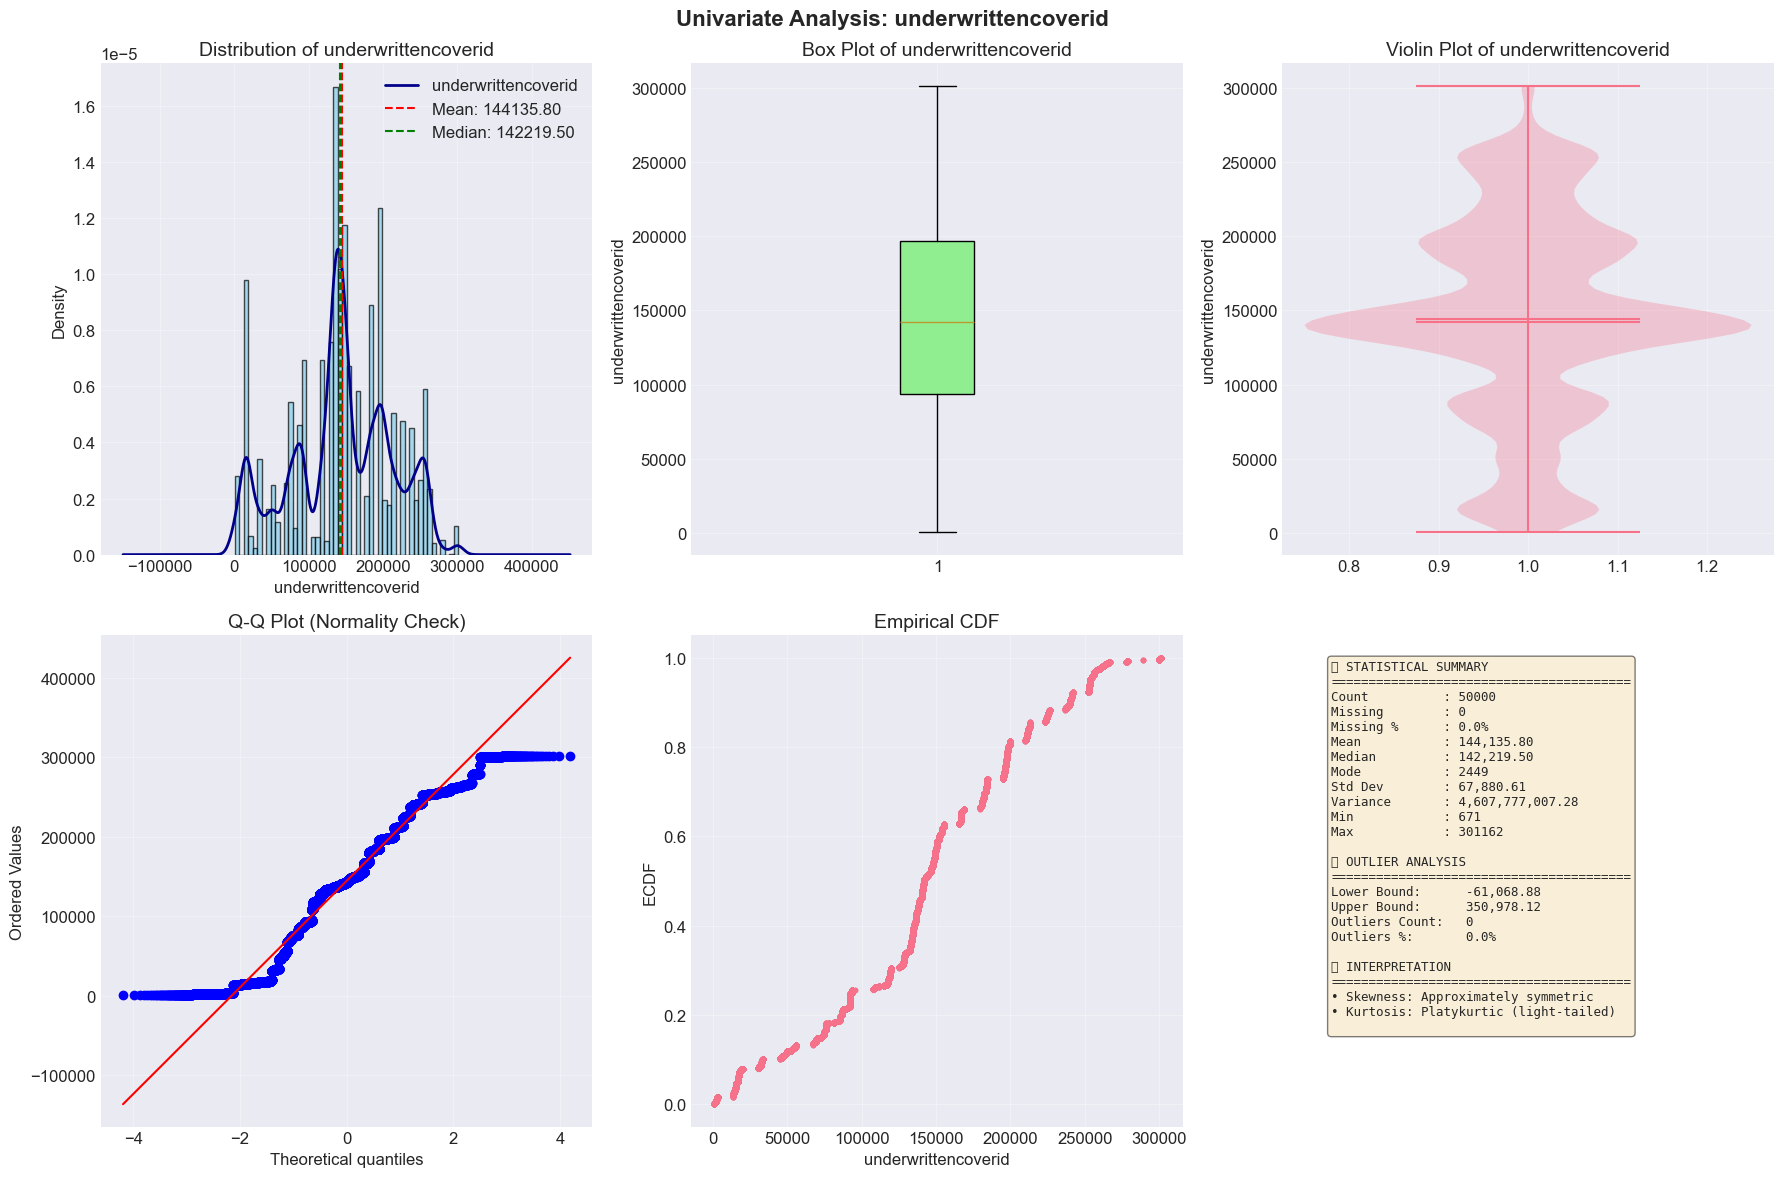


✅ Analysis complete for 'underwrittencoverid'
   • Mean: 144,135.80
   • Median: 142,219.50
   • Skewness: -0.195
   • Outliers: N/A


In [6]:
# Cell 6: Call the Numerical Analysis Function
print("\n" + "="*80)
print("📈 ANALYZE A NUMERICAL VARIABLE")
print("="*80)

# Find numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    print(f"🔍 Found {len(numeric_cols)} numerical variables:")
    for i, col in enumerate(numeric_cols, 1):
        print(f"{i:2d}. {col}")
    
    # Analyze the first numerical variable
    print(f"\n📊 Analyzing first numerical variable: '{numeric_cols[0]}'")
    stats_result = analyze_numeric_variable(df, numeric_cols[0])
    
    # Show summary
    print(f"\n✅ Analysis complete for '{numeric_cols[0]}'")
    print(f"   • Mean: {stats_result['Mean']:,.2f}")
    print(f"   • Median: {stats_result['Median']:,.2f}")
    print(f"   • Skewness: {stats_result['Skewness']:.3f}")
    print(f"   • Outliers: {stats_result.get('Outliers Count', 'N/A')}")
    
else:
    print("⚠️ No numerical columns found in the dataset!")



📊 ANALYZE A CATEGORICAL VARIABLE
🔍 Found 36 categorical variables:
 1. transactionmonth               (Unique values: 22)
 2. citizenship                    (Unique values: 1)
 3. legaltype                      (Unique values: 2)
 4. title                          (Unique values: 3)
 5. language                       (Unique values: 1)
 6. bank                           (Unique values: 5)
 7. accounttype                    (Unique values: 2)
 8. maritalstatus                  (Unique values: 2)
 9. gender                         (Unique values: 2)
10. country                        (Unique values: 1)
11. province                       (Unique values: 9)
12. maincrestazone                 (Unique values: 16)
13. subcrestazone                  (Unique values: 39)
14. itemtype                       (Unique values: 1)
15. vehicletype                    (Unique values: 5)
16. registrationyear               (Unique values: 22)
17. make                           (Unique values: 27)
18. model

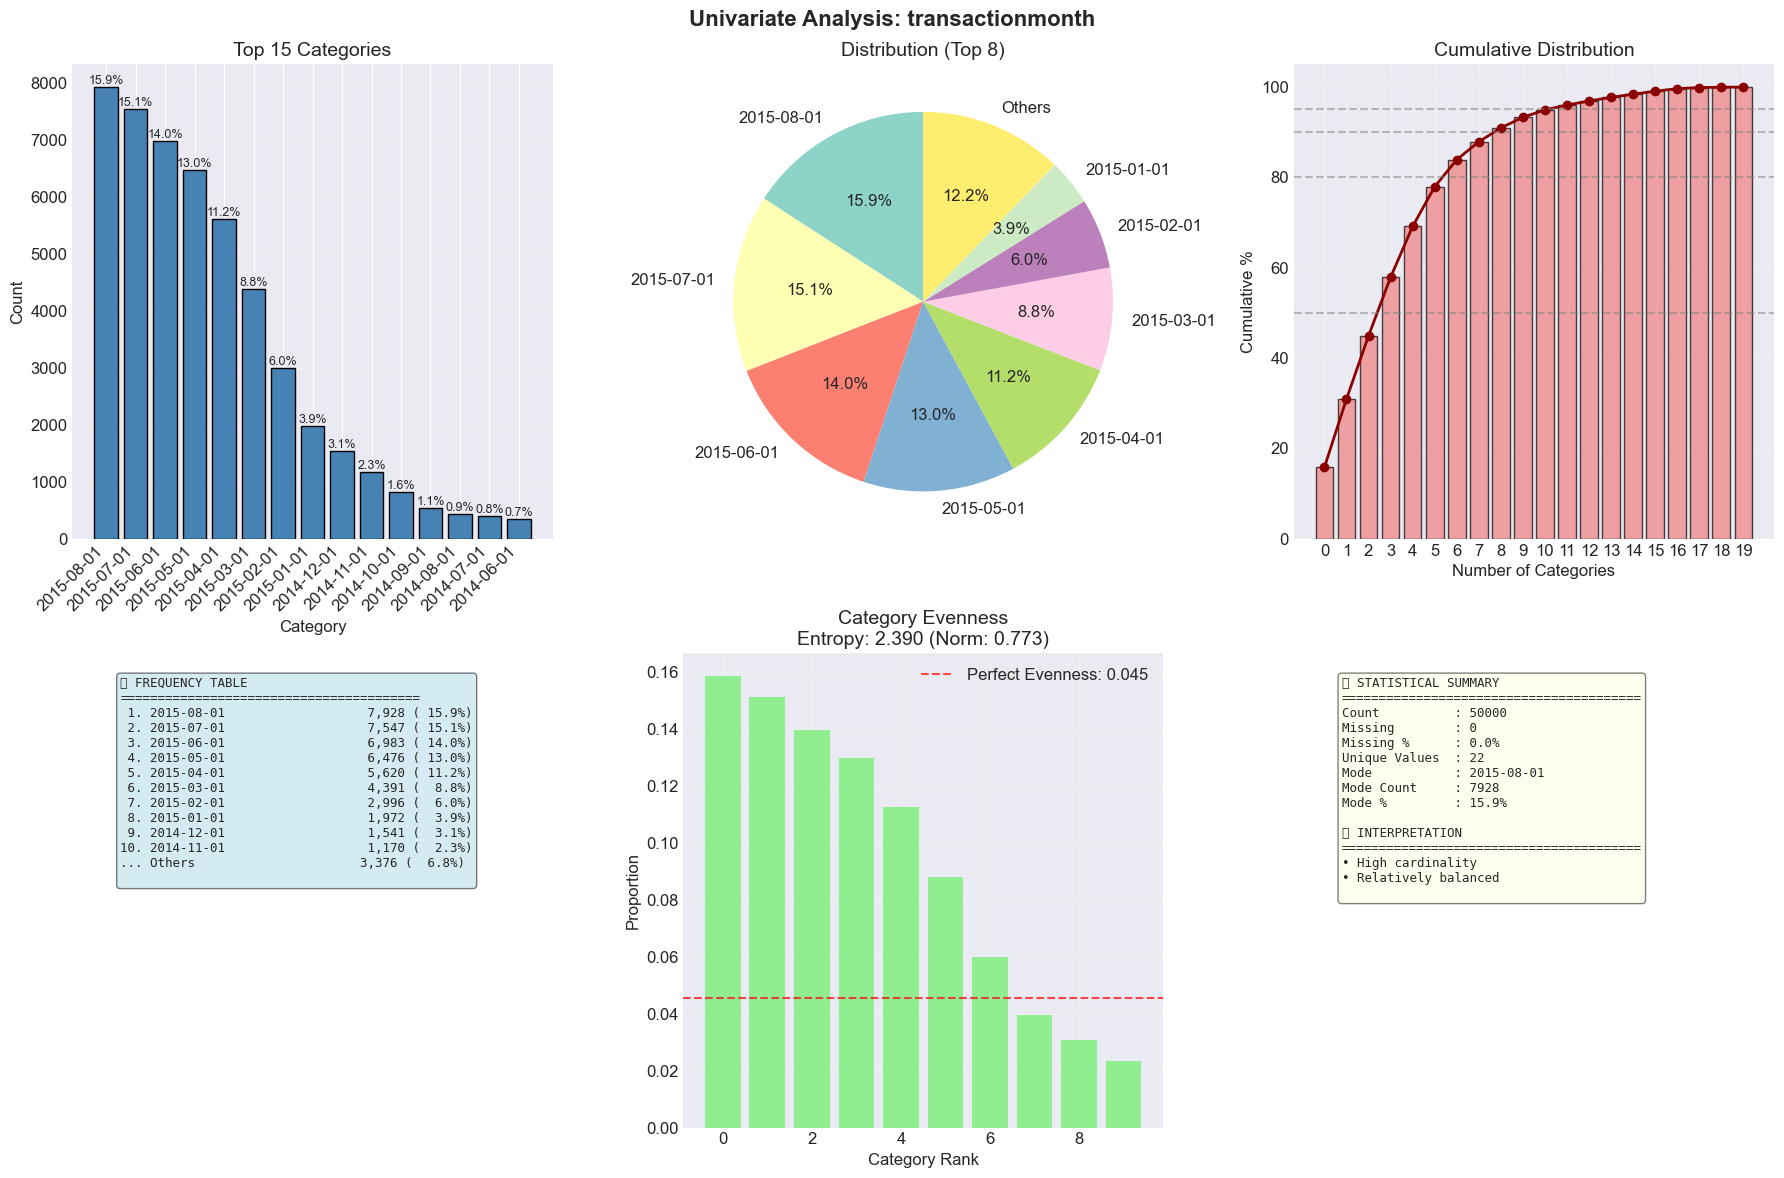


✅ Analysis complete for 'transactionmonth'
   • Unique values: 22
   • Mode: 2015-08-01
   • Mode %: 15.9%


In [7]:
# Cell 7: Call the Categorical Analysis Function
print("\n" + "="*80)
print("📊 ANALYZE A CATEGORICAL VARIABLE")
print("="*80)

# Find categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols) > 0:
    print(f"🔍 Found {len(categorical_cols)} categorical variables:")
    for i, col in enumerate(categorical_cols, 1):
        unique_count = df[col].nunique()
        print(f"{i:2d}. {col:30} (Unique values: {unique_count:,})")
    
    # Analyze the first categorical variable
    print(f"\n📊 Analyzing first categorical variable: '{categorical_cols[0]}'")
    stats_result = analyze_categorical_variable(df, categorical_cols[0])
    
    # Show summary
    print(f"\n✅ Analysis complete for '{categorical_cols[0]}'")
    print(f"   • Unique values: {stats_result['Unique Values']:,}")
    print(f"   • Mode: {stats_result['Mode']}")
    print(f"   • Mode %: {stats_result['Mode %']}")
    
else:
    print("⚠️ No categorical columns found in the dataset!")


In [8]:
# Cell 8: Binary Variable Analysis (FIXED - lowercase column names)
print("\n" + "="*80)
print("🔘 ANALYZE SINGLE BINARY VARIABLE")
print("="*80)

import matplotlib.pyplot as plt

# Check for binary columns (case-insensitive)
binary_column = None
possible_names = ['claimflag', 'claim_flag', 'claim', 'isclaim', 'hasclaim']

for name in possible_names:
    if name in [col.lower() for col in df.columns]:
        # Find the actual column name (preserving case)
        for actual_col in df.columns:
            if actual_col.lower() == name:
                binary_column = actual_col
                break
        if binary_column:
            break

if binary_column:
    print(f"\n📊 Analysis of {binary_column} (Binary Variable)")
    print("-"*50)
    
    # Convert to string to handle mixed types
    df[binary_column] = df[binary_column].astype(str)
    value_counts = df[binary_column].value_counts()
    n = len(df[binary_column])
    
    # Check if it's actually binary
    unique_values = df[binary_column].nunique()
    if unique_values > 2:
        print(f"⚠️  Warning: {binary_column} has {unique_values} unique values (expected 2)")
        print(f"Top {min(5, unique_values)} values:")
        for val, count in value_counts.head(5).items():
            print(f"  • {val}: {count:,} ({count/n*100:.1f}%)")
    else:
        print(f"✅ Confirmed binary variable with {unique_values} classes")
    
    print(f"\nTotal observations: {n:,}")
    
    if len(value_counts) >= 1:
        print(f"Class '{value_counts.index[0]}': {value_counts.iloc[0]:,} ({value_counts.iloc[0]/n*100:.1f}%)")
    
    if len(value_counts) >= 2:
        print(f"Class '{value_counts.index[1]}': {value_counts.iloc[1]:,} ({value_counts.iloc[1]/n*100:.1f}%)")
    
    if len(value_counts) >= 2:
        # Imbalance ratio
        majority = max(value_counts.iloc[0], value_counts.iloc[1])
        minority = min(value_counts.iloc[0], value_counts.iloc[1])
        imbalance_ratio = majority / minority if minority > 0 else float('inf')
        print(f"\n📈 Class Imbalance:")
        print(f"Imbalance Ratio: {imbalance_ratio:.1f}:1")
        
        if imbalance_ratio > 4:
            print("⚠️  Significant class imbalance detected!")
        elif imbalance_ratio > 10:
            print("🚨 Severe class imbalance detected!")
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Pie chart
        try:
            axes[0].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
                       colors=['lightgreen', 'lightcoral'], startangle=90)
            axes[0].set_title(f'{binary_column} Distribution')
        except Exception as e:
            axes[0].text(0.5, 0.5, f"Error creating pie chart", 
                        ha='center', va='center', transform=axes[0].transAxes)
            axes[0].set_title('Binary Distribution (Error)')
        
        # Bar chart
        try:
            bars = axes[1].bar(range(len(value_counts)), value_counts.values, 
                              color=['lightgreen', 'lightcoral'], edgecolor='black')
            axes[1].set_title(f'{binary_column} Counts')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_xticks(range(len(value_counts)))
            axes[1].set_xticklabels(value_counts.index)
            
            for i, bar in enumerate(bars):
                height = bar.get_height()
                axes[1].text(bar.get_x() + bar.get_width()/2., height,
                            f'{int(height):,}\n({height/n*100:.1f}%)', 
                            ha='center', va='bottom')
        except Exception as e:
            axes[1].text(0.5, 0.5, f"Error creating bar chart", 
                        ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('Counts (Error)')
        
        plt.tight_layout()
        plt.show()
    
    # Missing values
    missing = df[binary_column].isnull().sum()
    if missing > 0:
        print(f"\n⚠️  Missing values: {missing:,} ({missing/n*100:.1f}%)")
    
else:
    print("❌ No binary claim flag column found.")
    
    # Show binary columns found earlier
    print("\n🔍 Available binary/low-cardinality columns:")
    binary_cols = []
    for col in df.columns:
        unique_vals = df[col].nunique()
        if 2 <= unique_vals <= 5:  # Include low-cardinality categorical
            non_null = df[col].notna().sum()
            if non_null > 0:
                binary_cols.append((col, unique_vals))
    
    if binary_cols:
        for col, unique_vals in binary_cols[:10]:  # Show top 10
            sample_vals = df[col].dropna().unique()[:3]
            print(f"  • {col} ({unique_vals} values): {sample_vals}")
        
        print(f"\n💡 Pick one to analyze, e.g.:")
        print(f"   # Analyze gender column")
        print(f"   binary_column = 'gender'")
        print(f"   # Then run analysis on that column")
    else:
        print("❌ No binary columns found.")

print("\n" + "="*80)
print("✅ BINARY ANALYSIS COMPLETE")
print("="*80)


🔘 ANALYZE SINGLE BINARY VARIABLE
❌ No binary claim flag column found.

🔍 Available binary/low-cardinality columns:
  • isvatregistered (2 values): [ True False]
  • legaltype (2 values): ['Close Corporation' 'Individual']
  • title (3 values): ['Mr' 'Dr' 'Miss']
  • bank (5 values): ['First National Bank' 'Standard Bank' 'ABSA Bank']
  • accounttype (2 values): ['Current account' 'Savings account']
  • maritalstatus (2 values): ['Not specified' 'Married']
  • gender (2 values): ['Not specified' 'Male']
  • vehicletype (5 values): ['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial']
  • numberofdoors (5 values): [4. 5. 2.]
  • trackingdevice (2 values): ['No' 'Yes']

💡 Pick one to analyze, e.g.:
   # Analyze gender column
   binary_column = 'gender'
   # Then run analysis on that column

✅ BINARY ANALYSIS COMPLETE



📅 ANALYZE SINGLE DATETIME VARIABLE

📊 Analysis of transactionmonth
--------------------------------------------------
📈 Date Statistics:
  Start Date          : 2013-11-01 00:00:00
  End Date            : 2015-08-01 00:00:00
  Date Range          : 638 days 00:00:00
  Missing Dates       : 0
  Unique Dates        : 22
  Total Records       : 50000


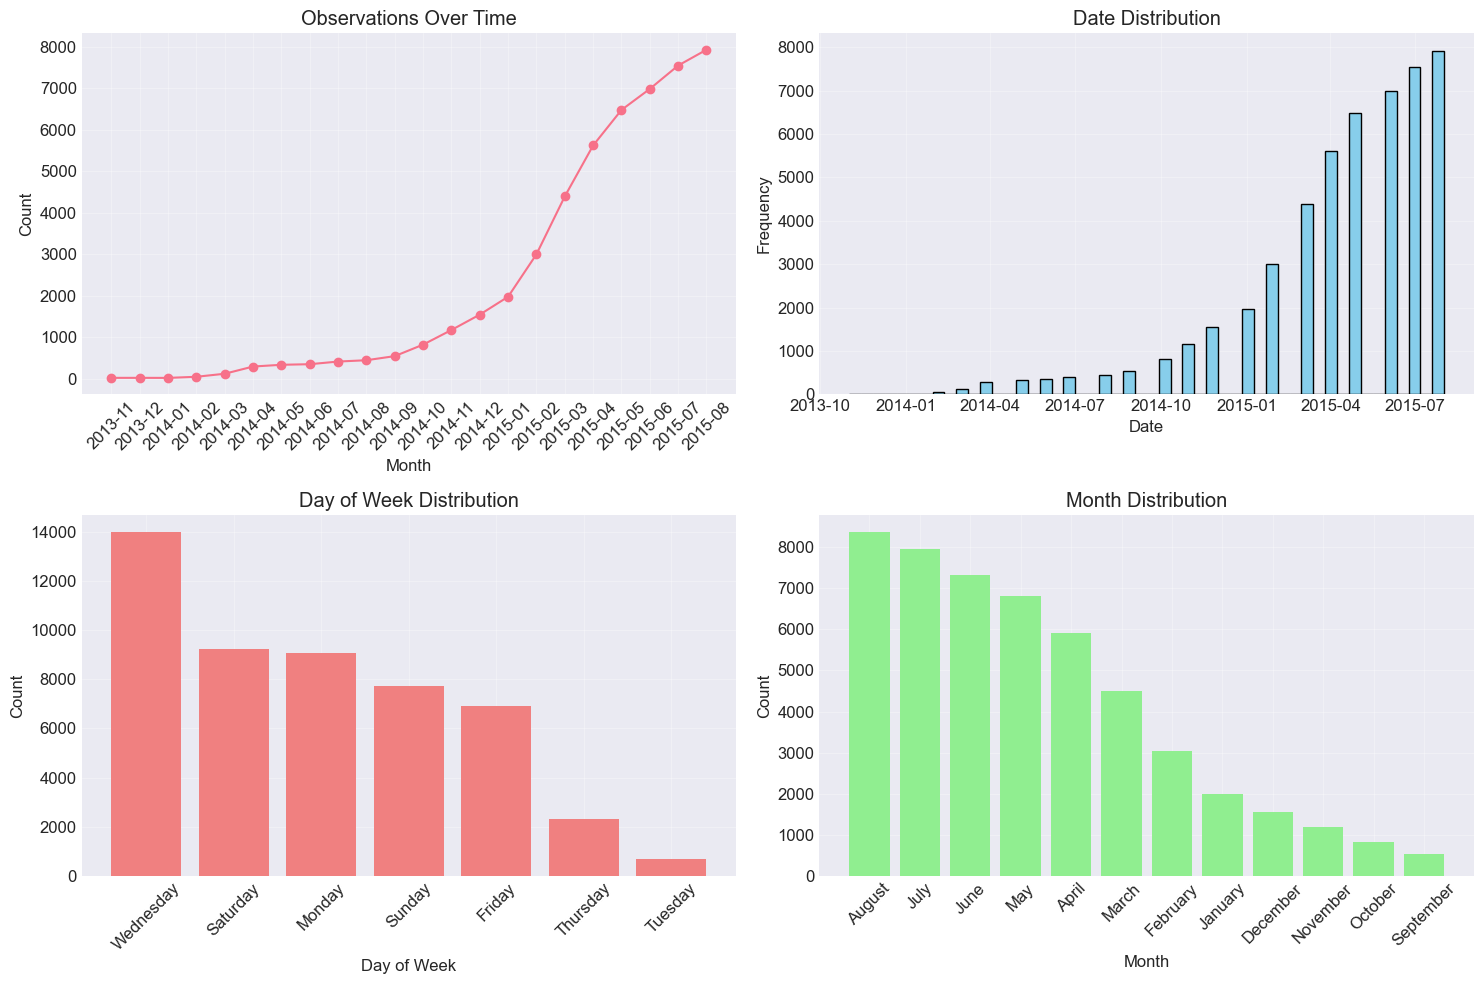


📊 Busiest day: Wednesday
📅 Busiest month: August

✅ DATETIME ANALYSIS COMPLETE


In [9]:
# Cell 9: DateTime Variable Analysis (FIXED - lowercase column names)
print("\n" + "="*80)
print("📅 ANALYZE SINGLE DATETIME VARIABLE")
print("="*80)

import matplotlib.pyplot as plt
import pandas as pd

# Check for date columns (case-insensitive)
date_column = None
possible_names = ['transactionmonth', 'transaction_month', 'date', 'month', 'transactiondate', 
                  'transaction_date', 'period', 'time', 'timestamp']

for name in possible_names:
    if name in [col.lower() for col in df.columns]:
        # Find the actual column name (preserving case)
        for actual_col in df.columns:
            if actual_col.lower() == name:
                date_column = actual_col
                break
        if date_column:
            break

if date_column:
    print(f"\n📊 Analysis of {date_column}")
    print("-"*50)
    
    # Convert to datetime if not already
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Check if conversion was successful
    if df[date_column].isnull().all():
        print(f"❌ Could not convert {date_column} to datetime. All values are null after conversion.")
        print(f"Sample values: {df[date_column].head(5).tolist()}")
    else:
        # Calculate statistics
        date_stats = {
            'Start Date': df[date_column].min(),
            'End Date': df[date_column].max(),
            'Date Range': str(df[date_column].max() - df[date_column].min()),
            'Missing Dates': int(df[date_column].isnull().sum()),
            'Unique Dates': int(df[date_column].nunique()),
            'Total Records': len(df)
        }
        
        print("📈 Date Statistics:")
        for key, value in date_stats.items():
            print(f"  {key:20}: {value}")
        
        # Check if there are enough valid dates to plot
        valid_dates = df[date_column].dropna()
        if len(valid_dates) < 2:
            print("❌ Not enough valid dates for visualization (need at least 2).")
        else:
            # Visualization
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            # 1. Time series count
            try:
                date_counts = df[date_column].dt.to_period('M').value_counts().sort_index()
                axes[0, 0].plot(date_counts.index.astype(str), date_counts.values, marker='o')
                axes[0, 0].set_title('Observations Over Time')
                axes[0, 0].set_xlabel('Month')
                axes[0, 0].set_ylabel('Count')
                axes[0, 0].tick_params(axis='x', rotation=45)
                axes[0, 0].grid(True, alpha=0.3)
            except Exception as e:
                axes[0, 0].text(0.5, 0.5, f"Error plotting time series", 
                              ha='center', va='center', transform=axes[0, 0].transAxes)
                axes[0, 0].set_title('Time Series (Error)')
            
            # 2. Histogram of dates
            try:
                axes[0, 1].hist(df[date_column].dropna(), bins=50, color='skyblue', edgecolor='black')
                axes[0, 1].set_title('Date Distribution')
                axes[0, 1].set_xlabel('Date')
                axes[0, 1].set_ylabel('Frequency')
                axes[0, 1].grid(True, alpha=0.3)
            except Exception as e:
                axes[0, 1].text(0.5, 0.5, f"Error plotting histogram", 
                              ha='center', va='center', transform=axes[0, 1].transAxes)
                axes[0, 1].set_title('Histogram (Error)')
            
            # 3. Day of week pattern
            try:
                df['DayOfWeek_temp'] = df[date_column].dt.day_name()
                dow_counts = df['DayOfWeek_temp'].value_counts()
                axes[1, 0].bar(dow_counts.index, dow_counts.values, color='lightcoral')
                axes[1, 0].set_title('Day of Week Distribution')
                axes[1, 0].set_xlabel('Day of Week')
                axes[1, 0].set_ylabel('Count')
                axes[1, 0].tick_params(axis='x', rotation=45)
                axes[1, 0].grid(True, alpha=0.3)
            except Exception as e:
                axes[1, 0].text(0.5, 0.5, f"Error plotting day of week", 
                              ha='center', va='center', transform=axes[1, 0].transAxes)
                axes[1, 0].set_title('Day of Week (Error)')
            
            # 4. Month pattern
            try:
                df['Month_temp'] = df[date_column].dt.month_name()
                month_counts = df['Month_temp'].value_counts()
                axes[1, 1].bar(month_counts.index, month_counts.values, color='lightgreen')
                axes[1, 1].set_title('Month Distribution')
                axes[1, 1].set_xlabel('Month')
                axes[1, 1].set_ylabel('Count')
                axes[1, 1].tick_params(axis='x', rotation=45)
                axes[1, 1].grid(True, alpha=0.3)
            except Exception as e:
                axes[1, 1].text(0.5, 0.5, f"Error plotting month distribution", 
                              ha='center', va='center', transform=axes[1, 1].transAxes)
                axes[1, 1].set_title('Month Distribution (Error)')
            
            plt.tight_layout()
            plt.show()
            
            # Additional insights
            if 'DayOfWeek_temp' in df.columns:
                busiest_day = df['DayOfWeek_temp'].mode().iloc[0] if len(df['DayOfWeek_temp'].mode()) > 0 else 'N/A'
                print(f"\n📊 Busiest day: {busiest_day}")
            
            if 'Month_temp' in df.columns:
                busiest_month = df['Month_temp'].mode().iloc[0] if len(df['Month_temp'].mode()) > 0 else 'N/A'
                print(f"📅 Busiest month: {busiest_month}")
            
            # Clean up temporary columns
            if 'DayOfWeek_temp' in df.columns:
                df.drop('DayOfWeek_temp', axis=1, inplace=True)
            if 'Month_temp' in df.columns:
                df.drop('Month_temp', axis=1, inplace=True)
                
else:
    print("❌ No date column found with common names.")
    
    # Show columns that might be dates
    print(f"\n🔍 Columns that might contain dates (looking at column names):")
    potential_dates = []
    for col in df.columns:
        col_lower = col.lower()
        date_keywords = ['date', 'month', 'year', 'time', 'period', 'created', 'modified', 'timestamp']
        if any(keyword in col_lower for keyword in date_keywords):
            potential_dates.append(col)
    
    if potential_dates:
        print(f"Found {len(potential_dates)} potential date columns:")
        for col in potential_dates:
            sample = str(df[col].dropna().iloc[0]) if len(df[col].dropna()) > 0 else "EMPTY"
            print(f"  • {col}: Sample = {sample[:50]}...")
        
        print(f"\n💡 Try analyzing one of these, e.g.:")
        print(f"   # Manually analyze transactionmonth")
        print(f"   df['transactionmonth'] = pd.to_datetime(df['transactionmonth'], errors='coerce')")
        print(f"   # Then check if conversion worked")
    else:
        print("❌ No columns with date-like names found.")
        print(f"\n📋 First 20 columns:")
        for i, col in enumerate(df.columns[:20], 1):
            print(f"  {i:3d}. {col}")

print("\n" + "="*80)
print("✅ DATETIME ANALYSIS COMPLETE")
print("="*80)

In [10]:
# Cell 10: Create Compact Summary Report
print("\n" + "="*80)
print("📋 UNIVARIATE ANALYSIS SUMMARY")
print("="*80)

import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import json

# Function for compact summary
def compact_summary(df):
    """Create compact univariate summary"""
    summary = []
    
    for col in df.columns:
        dtype = str(df[col].dtype)
        non_null = df[col].notna().sum()
        missing = len(df) - non_null
        missing_pct = (missing / len(df)) * 100
        
        # Basic info for all columns
        row = {
            'col': col,
            'type': dtype,
            'n': int(non_null),
            'miss': int(missing),
            'miss_pct': round(missing_pct, 1),
            'uniq': int(df[col].nunique())
        }
        
        # Add type-specific stats
        if pd.api.types.is_numeric_dtype(df[col]) and dtype != 'bool':
            # Numeric (not boolean)
            data = df[col].dropna()
            if len(data) > 0:
                try:
                    row['min'] = round(float(data.min()), 2)
                    row['max'] = round(float(data.max()), 2)
                    row['mean'] = round(float(data.mean()), 2)
                except:
                    pass
        
        elif dtype == 'bool':
            # Boolean column
            try:
                true_count = int(df[col].sum())
                false_count = int(non_null - true_count)
                row['true'] = true_count
                row['false'] = false_count
                if non_null > 0:
                    row['true_pct'] = round((true_count / non_null) * 100, 1)
            except:
                pass
        
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Datetime column
            data = df[col].dropna()
            if len(data) > 0:
                try:
                    row['start'] = str(data.min())[:10]  # First 10 chars: YYYY-MM-DD
                    row['end'] = str(data.max())[:10]
                except:
                    pass
        
        elif df[col].nunique() < 50:  # Small/medium categorical
            try:
                mode_val = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else None
                if mode_val is not None:
                    mode_pct = (df[col] == mode_val).sum() / len(df) * 100
                    # Truncate long mode values
                    mode_str = str(mode_val)
                    if len(mode_str) > 15:
                        mode_str = mode_str[:12] + '...'
                    row['mode'] = mode_str
                    row['mode_pct'] = round(mode_pct, 1)
            except:
                pass
        
        summary.append(row)
    
    return pd.DataFrame(summary)

# Generate compact summary
summary_df = compact_summary(df)

# Quick stats
print(f"\n📊 Dataset: {df.shape[0]:,} rows × {df.shape[1]} cols")
print(f"📈 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Count missing
missing_total = df.isnull().sum().sum()
print(f"⚠️  Missing: {missing_total:,} cells")

# Type counts
numeric = 0
bool_cols = 0
categorical = 0
datetime_cols = 0
other = 0

for col in df.columns:
    dtype = str(df[col].dtype)
    if pd.api.types.is_numeric_dtype(df[col]) and dtype != 'bool':
        numeric += 1
    elif dtype == 'bool':
        bool_cols += 1
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        datetime_cols += 1
    elif dtype == 'object':
        categorical += 1
    else:
        other += 1

print(f"🔢 Types: {numeric} num, {bool_cols} bool, {categorical} cat, {datetime_cols} date, {other} other")

# Save compact CSV
reports_dir = Path("reports")
reports_dir.mkdir(exist_ok=True)

summary_path = reports_dir / "summary_compact.csv"
summary_df.to_csv(summary_path, index=False)
size_kb = summary_path.stat().st_size / 1024 if summary_path.exists() else 0
print(f"\n💾 Summary saved: {summary_path.name} ({size_kb:.1f} KB)")

# Save minimal JSON (FIXED VERSION)
summary_dict = {
    'rows': int(df.shape[0]),
    'cols': int(df.shape[1]),
    'mem_mb': round(df.memory_usage(deep=True).sum() / 1024**2, 1),
    'missing': int(missing_total),
    'types': {
        'num': numeric,
        'bool': bool_cols, 
        'cat': categorical,
        'date': datetime_cols,
        'other': other
    },
    'time': datetime.now().strftime("%H:%M")
}

# Add top 5 columns with most missing (as simple dict)
missing_cols = df.isnull().sum().sort_values(ascending=False).head(5)
top_missing = {}
for col, count in missing_cols.items():
    if count > 0:
        pct = (count / len(df)) * 100
        top_missing[col] = {
            'cnt': int(count),
            'pct': round(pct, 1)
        }

if top_missing:
    summary_dict['top_missing'] = top_missing

json_path = reports_dir / "summary_mini.json"
with open(json_path, 'w') as f:
    # Convert all values to JSON-serializable types
    json.dump(summary_dict, f, separators=(',', ':'), default=str)
size_kb_json = json_path.stat().st_size / 1024 if json_path.exists() else 0
print(f"💾 JSON saved: {json_path.name} ({size_kb_json:.1f} KB)")

# Show top issues
if missing_total > 0:
    print(f"\n🔝 TOP 5 WITH MOST MISSING:")
    for col, count in missing_cols.items():
        if count > 0:
            pct = (count / len(df)) * 100
            print(f"  • {col}: {count:,} ({pct:.1f}%)")
else:
    print(f"\n✅ No missing values found!")

# Show sample of summary (first 8 columns)
print(f"\n📋 SAMPLE (first 8 columns):")
for i, row in summary_df.head(8).iterrows():
    col_name = row['col'][:18] + '...' if len(row['col']) > 18 else row['col']
    type_str = row['type'][:8]
    uniq_str = f"{row['uniq']:,}"
    
    # Add extra info based on type
    extra = ""
    if row['type'] == 'bool' and 'true_pct' in row:
        extra = f" | True: {row['true_pct']}%"
    elif 'mean' in row:
        extra = f" | μ: {row['mean']}"
    elif 'mode_pct' in row:
        extra = f" | Mode: {row['mode_pct']}%"
    
    print(f"  {i+1:2d}. {col_name:21} [{type_str:8}] Uniq: {uniq_str:6}{extra}")

print("\n" + "="*80)
print("✅ SUMMARY COMPLETE")
print("="*80)

# Optional: Show boolean column summary
if bool_cols > 0:
    print(f"\n🔘 BOOLEAN COLUMNS ({bool_cols}):")
    bool_summary = summary_df[summary_df['type'] == 'bool']
    for _, row in bool_summary.iterrows():
        if 'true_pct' in row:
            print(f"  • {row['col']}: {row['true']:,} True ({row['true_pct']}%), {row['false']:,} False")

# Ultra-minimal version (tinyest possible)
print(f"\n💾 Saving ultra-minimal version...")
tiny_dict = {
    'r': df.shape[0],
    'c': df.shape[1],
    'mb': round(df.memory_usage(deep=True).sum() / 1024**2, 1),
    'na': int(missing_total),
    't': datetime.now().strftime("%H%M")
}

tiny_path = reports_dir / "summary_tiny.json"
with open(tiny_path, 'w') as f:
    json.dump(tiny_dict, f, separators=(',', ':'))
size_tiny = tiny_path.stat().st_size if tiny_path.exists() else 0
print(f"✅ Tiny JSON: {tiny_path.name} ({size_tiny} bytes)")


📋 UNIVARIATE ANALYSIS SUMMARY

📊 Dataset: 50,000 rows × 52 cols
📈 Memory: 121.4 MB
⚠️  Missing: 50,000 cells
🔢 Types: 15 num, 1 bool, 35 cat, 1 date, 0 other

💾 Summary saved: summary_compact.csv (3.1 KB)
💾 JSON saved: summary_mini.json (0.2 KB)

🔝 TOP 5 WITH MOST MISSING:
  • numberofvehiclesinfleet: 50,000 (100.0%)

📋 SAMPLE (first 8 columns):
   1. underwrittencoveri... [int64   ] Uniq: 8,882  | μ: 144135.8
   2. policyid              [int64   ] Uniq: 831    | μ: 11382.74
   3. transactionmonth      [datetime] Uniq: 22     | μ: nan
   4. isvatregistered       [bool    ] Uniq: 2      | True: 1.6%
   5. citizenship           [object  ] Uniq: 1      | μ: nan
   6. legaltype             [object  ] Uniq: 2      | μ: nan
   7. title                 [object  ] Uniq: 3      | μ: nan
   8. language              [object  ] Uniq: 1      | μ: nan

✅ SUMMARY COMPLETE

🔘 BOOLEAN COLUMNS (1):
  • isvatregistered: 801.0 True (1.6%), 49,199.0 False

💾 Saving ultra-minimal version...
✅ Tiny JSON: su